In [260]:
import pandas as pd
import urllib.request

data = pd.read_csv('../../twitter/tweetdata/2019_up1_tweet.csv', error_bad_lines=False)
data = data.append(pd.read_csv('../../twitter/tweetdata/2019_up1_tweet(e).csv', error_bad_lines=False))


In [261]:
text = data[['text']].astype(str)
text['text'] = text.apply(lambda row: row['text'].replace("/"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("-"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("—"," "), axis=1)
#text['main article'] = text.apply(lambda row: row['main article'].replace("",""), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("*"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("…"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("\\"," "), axis=1)



In [262]:
import nltk
text['text'] = text.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)

In [263]:
text['text']

0      [If, $, BTC, price, continue, to, ,, I, have, ...
1      [He, will, change, his, mind, about, #, bitcoi...
2      [Happy, #, Bitcoin, Pizza, Day, (, May, 22nd, ...
3      [#, TRON, Exceeds, #, Bitcoin, ’, s, 10, Years...
4      [It, takes, 319, days, of, #, TRON, to, surpas...
                             ...                        
161    [I, bet, all, my, Ethereum, that, this, will, ...
162    [I, ’, d, love, to, hear, opinions, here, ., R...
163    [Bang, !, NYC, Blockchain, week, pump, !, Here...
164    [Today, ,, just, for, the, next, few, hours, ,...
165    [I, sat, with, @, CamiRusso, today, and, heard...
Name: text, Length: 2775, dtype: object

In [264]:
# 소문자 적용 , - 문자 삭제
text['text'] = text['text'].apply(lambda x : [word.lower().replace("-","") for word in x])
# 공백문자 삭제
text['text'] = text['text'].apply(lambda x : [word for word in x if word])

In [265]:
from nltk.tag import pos_tag

text['pos tag'] = text.apply(lambda row: pos_tag(row['text']), axis=1)

In [266]:
text['pos tag']

0      [(if, IN), ($, $), (btc, JJ), (price, NN), (co...
1      [(he, PRP), (will, MD), (change, VB), (his, PR...
2      [(happy, JJ), (#, #), (bitcoin, JJ), (pizza, N...
3      [(#, #), (tron, NN), (exceeds, NNS), (#, #), (...
4      [(it, PRP), (takes, VBZ), (319, CD), (days, NN...
                             ...                        
161    [(i, JJ), (bet, VBP), (all, DT), (my, PRP$), (...
162    [(i, NN), (’, VBP), (d, NN), (love, NN), (to, ...
163    [(bang, NN), (!, .), (nyc, NN), (blockchain, N...
164    [(today, NN), (,, ,), (just, RB), (for, IN), (...
165    [(i, NN), (sat, VBD), (with, IN), (@, NNP), (c...
Name: pos tag, Length: 2775, dtype: object

In [267]:
# 불용어 품사 제거
text['text'] = text['pos tag'].apply(lambda x: [word[0] for word in x if word[1] not in ('CC','CD','DT','EX','IN','LS','MD','PRP','PRP$','RB','TO','UH','WDT','WP','WP$','WRB')])

In [268]:
text['text']

0      [$, btc, price, continue, ,, i, have, use, #, ...
1                   [change, mind, #, bitcoin, ., i, 'm]
2      [happy, #, bitcoin, pizza, day, (, ), ., creat...
3      [#, tron, exceeds, #, bitcoin, ’, s, years, tr...
4      [takes, days, #, tron, surpass, years, transac...
                             ...                        
161              [i, bet, ethereum, be, delayed, ..., .]
162    [i, ’, d, love, hear, opinions, ., real, opini...
163    [bang, !, nyc, blockchain, week, pump, !, is, ...
164    [today, ,, next, few, hours, ,, i, ’, m, ether...
165    [i, sat, @, camirusso, today, heard, little, b...
Name: text, Length: 2775, dtype: object

In [269]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['text'] = text['text'].apply(lambda x: [word for word in x if word not in (stop)])

In [270]:
import csv
stopword_list =[]
f = open('../../stopword/stop_en.txt', 'r')
reader = csv.reader(f)
for row in reader:
    #print(row[0])
    stopword_list.append(row[0])
    #pass
f.close()

text['text'] = text['text'].apply(lambda x: [word for word in x if word not in stopword_list])

In [271]:
import re
pattern=re.compile(r'\.')
print(pattern.search('abc.de'))

text['text'] = text['text'].apply(lambda x: [word for word in x if pattern.search(word)== None])

<re.Match object; span=(3, 4), match='.'>


In [272]:
number_pattern=re.compile(r'[0-9]\,[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if number_pattern.search(word)== None])

In [273]:
native_number_pattern=re.compile(r'[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if native_number_pattern.search(word)== None])

In [274]:
star_pattern=re.compile(r'[a-z0-9*]\*[a-z0-9*]')
text['text'] = text['text'].apply(lambda x: [word for word in x if star_pattern.search(word)== None])

In [275]:
from nltk.stem import WordNetLemmatizer
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x]) # 동사 
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='a') for word in x]) # 형용사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='n') for word in x]) # 명사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='r') for word in x]) # 부사
#print(text)

In [276]:
tokenized_doc = text['text'].apply(lambda x: [word for word in x if len(word) > 3])
#print(tokenized_doc)

In [277]:
article_contents = tokenized_doc.values.tolist()

In [278]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [279]:
tokenized_doc_tfidf = tokenized_doc.apply(lambda x : ' '.join(x))

In [280]:
article_contents_tfidf = tokenized_doc_tfidf.values.tolist()

In [281]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform([ " ".join(article_contents_tfidf) ])

In [282]:
word2id = defaultdict(lambda: 0)

In [283]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

In [284]:
tf_idf_result = []
token_list = []
for i, sent in enumerate([" ".join(article_contents_tfidf)]):
    for token in sent.split() :
        if token not in token_list :
            temp=[]
            temp.append(token)
            temp.append(sp_matrix[i, word2id[token]])
            token_list.append(token)
            tf_idf_result.append(temp)

In [285]:
len(tf_idf_result)

5209

In [286]:
tf_idf_value =[]
for tf_idf_element in tf_idf_result :
    tf_idf_value.append(tf_idf_element[1])
print(len(tf_idf_value))  ## tf-idf 값을 배열에 담음

5209


In [287]:
from gensim import corpora
tokenized_doc = [d.split() for d in token_list]
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) 

[(1, 1)]


In [288]:
import gensim
NUM_TOPICS = 4 #20개의 토픽, k=20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=50) 
# passes is similar with epoch , iterarion : loop per document
topics = ldamodel.print_topics(num_words=8)
for topic in topics:
    print(topic)

(0, '0.001*"dance" + 0.001*"encode" + 0.001*"tracemayer" + 0.001*"royamahboob" + 0.001*"cordano" + 0.001*"spiral" + 0.001*"bluewalletio" + 0.001*"scammer"')
(1, '0.001*"\'scams" + 0.001*"woonomic" + 0.001*"greg" + 0.001*"ticker" + 0.001*"trifecta" + 0.001*"\'grasshopper" + 0.001*"irrelevant" + 0.001*"barbershop"')
(2, '0.000*"unfreezable" + 0.000*"fledgling" + 0.000*"courtmwarner" + 0.000*"ideological" + 0.000*"float" + 0.000*"found" + 0.000*"jonahhill" + 0.000*"unfiltered"')
(3, '0.000*"spirit" + 0.000*"nano" + 0.000*"infect" + 0.000*"officer" + 0.000*"collaborative" + 0.000*"nakasendo" + 0.000*"proofofkeys" + 0.000*"bankster"')


In [289]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [290]:
sentences = article_contents

In [291]:
from gensim.models import Word2Vec

In [292]:
model = Word2Vec(sentences, min_count=1)

In [293]:
len(model.wv.vocab)

5209

In [294]:
X = model[model.wv.vocab]

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [295]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
#kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.euclidean_distance, repeats=25)
#euclidean_distance
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print(X)
#print(assigned_clusters)

In [296]:
import pandas as pd
import numpy as np
temp_heder = ['raw_data','word','cluster','centroid','distance','tfidf','score','closer#']
temp_cluster_result = pd.DataFrame(columns=temp_heder)

In [297]:
temp_cluster_result['word'] = list(model.wv.vocab)

In [298]:
temp_cluster_result['cluster'] = assigned_clusters

In [299]:
temp_cluster_result['raw_data'] = X.tolist()

In [300]:
#temp_cluster_result['raw_data']
temp_cluster_result['centroid'] = temp_cluster_result['cluster'].apply(lambda x : kclusterer.means()[x])

In [301]:
from sklearn.metrics import pairwise_distances

In [302]:
cosine_centroid_list = []
for cosine_centroid in temp_cluster_result['centroid'] :
    cosine_centroid_list.append(cosine_centroid.tolist())

In [303]:
len(cosine_centroid_list)

5209

In [304]:
temp_distance = pairwise_distances(X,cosine_centroid_list, metric='cosine')

In [305]:
sum(temp_distance[3])

154.59973456241252

In [306]:
import scipy.spatial.distance as dist

In [307]:
dist.cosine(X[0],cosine_centroid_list[0])

8.935847853597245e-05

In [308]:
dist.euclidean(X[0],cosine_centroid_list[0])

2.7290141847566023

In [309]:
temp_cluster_result['distance'] = temp_cluster_result.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)

In [310]:
temp_cluster_result['tfidf'] = tf_idf_value
temp_cluster_result['score'] = temp_cluster_result.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result

In [311]:
temp_cluster_result[temp_cluster_result['cluster']==0].sort_values(by=['score']).head(20)  # 거래소, 돈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
4,"[-1.0036073923110962, -0.008794211782515049, -...",bitcoin,0,"[-0.041797277, -0.00024935434, -0.0019922087, ...",0.000014,0.928384,0.071630,NaN
81,"[-0.6127945780754089, -0.010919773019850254, -...",http,0,"[-0.041797277, -0.00024935434, -0.0019922087, ...",0.000035,0.112937,0.887099,NaN
182,"[-0.4589335322380066, -0.00788220763206482, -0...",market,0,"[-0.041797277, -0.00024935434, -0.0019922087, ...",0.000057,0.089603,0.910454,NaN
133,"[-0.4867064654827118, -0.008046126924455166, -...",gold,0,"[-0.041797277, -0.00024935434, -0.0019922087, ...",0.000053,0.077780,0.922272,NaN
181,"[-0.5144179463386536, -0.00909004919230938, -0...",crypto,0,"[-0.041797277, -0.00024935434, -0.0019922087, ...",0.000043,0.077158,0.922885,NaN
37,"[-0.45693156123161316, -0.007985103875398636, ...",ethereum,0,"[-0.041797277, -0.00024935434, -0.0019922087, ...",0.000048,0.076225,0.923824,NaN
49,"[-0.4911003112792969, -0.008055725134909153, -...",people,0,"[-0.041797277, -0.00024935434, -0.0019922087, ...",0.000045,0.063157,0.936888,NaN
320,"[-0.531276285648346, -0.009800193831324577, -0...",time,0,"[-0.041797277, -0.00024935434, -0.0019922087, ...",0.000037,0.059424,0.940613,NaN
1997,"[-0.3102923333644867, -0.007397029548883438, -...",keiser,0,"[-0.041797277, -0.00024935434, -0.0019922087, ...",0.000099,0.059424,0.940675,NaN
0,"[-0.4410771131515503, -0.008013321086764336, -...",price,0,"[-0.041797277, -0.00024935434, -0.0019922087, ...",0.000089,0.058491,0.941599,NaN


In [312]:
temp_cluster_result[temp_cluster_result['cluster']==1].sort_values(by=['score']).head(30)  # 인플

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
997,"[-0.025462660938501358, -0.0016003375640138984...",owner,1,"[-0.007377398, -0.00044462562, -6.574294e-05, ...",0.010228,0.001244,1.008983,NaN
3435,"[-0.02700512297451496, -0.0014409353025257587,...",coincenter,1,"[-0.007377398, -0.00044462562, -6.574294e-05, ...",0.012414,0.000933,1.011480,NaN
1293,"[-0.025812307372689247, 0.0008914442150853574,...",reminder,1,"[-0.007377398, -0.00044462562, -6.574294e-05, ...",0.014689,0.001867,1.012823,NaN
1089,"[-0.026005813851952553, -0.002368407091125846,...",specific,1,"[-0.007377398, -0.00044462562, -6.574294e-05, ...",0.015130,0.001556,1.013575,NaN
2597,"[-0.023540547117590904, 0.0047102998942136765,...",interfere,1,"[-0.007377398, -0.00044462562, -6.574294e-05, ...",0.016928,0.000933,1.015994,NaN
3824,"[-0.017486263066530228, -0.00504877045750618, ...",trap,1,"[-0.007377398, -0.00044462562, -6.574294e-05, ...",0.018191,0.000622,1.017568,NaN
224,"[-0.021153731271624565, 0.0001428023533662781,...",wish,1,"[-0.007377398, -0.00044462562, -6.574294e-05, ...",0.019395,0.001556,1.017839,NaN
4619,"[-0.021949416026473045, -0.0006989981047809124...",lock,1,"[-0.007377398, -0.00044462562, -6.574294e-05, ...",0.019075,0.000622,1.018453,NaN
76,"[-0.021464237943291664, -0.004026355221867561,...",manifest,1,"[-0.007377398, -0.00044462562, -6.574294e-05, ...",0.019608,0.000933,1.018675,NaN
3469,"[-0.020523833110928535, -0.003724962007254362,...",foundational,1,"[-0.007377398, -0.00044462562, -6.574294e-05, ...",0.020040,0.000622,1.019417,NaN


In [313]:
temp_cluster_result[temp_cluster_result['cluster']==2].sort_values(by=['score']).head(30)   # 비즈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
2927,"[-0.0189000703394413, -0.0017083848360925913, ...",utxos,2,"[-0.0047505903, -0.00090366823, -0.00055361306...",0.022424,0.000622,1.021801,NaN
3774,"[-0.015243841335177422, -0.0031117217149585485...",cryptographic,2,"[-0.0047505903, -0.00090366823, -0.00055361306...",0.031161,0.000622,1.030539,NaN
2359,"[-0.015798406675457954, -0.004206419922411442,...",singularity,2,"[-0.0047505903, -0.00090366823, -0.00055361306...",0.040634,0.000311,1.040323,NaN
3026,"[-0.014480166137218475, -0.0034271092154085636...",thermodynamic,2,"[-0.0047505903, -0.00090366823, -0.00055361306...",0.041346,0.000622,1.040724,NaN
3857,"[-0.01699237897992134, -0.004983328748494387, ...",flibbr,2,"[-0.0047505903, -0.00090366823, -0.00055361306...",0.042833,0.000311,1.042522,NaN
1721,"[-0.012244073674082756, 0.0018414808437228203,...",odds,2,"[-0.0047505903, -0.00090366823, -0.00055361306...",0.045312,0.000622,1.044690,NaN
516,"[-0.0163249708712101, -0.004312082193791866, -...",solo,2,"[-0.0047505903, -0.00090366823, -0.00055361306...",0.052514,0.000622,1.051892,NaN
3188,"[-0.008449248969554901, -0.004171098582446575,...",consolidation,2,"[-0.0047505903, -0.00090366823, -0.00055361306...",0.052709,0.000622,1.052087,NaN
2476,"[-0.012820346280932426, 0.0030619280878454447,...",hefty,2,"[-0.0047505903, -0.00090366823, -0.00055361306...",0.052641,0.000311,1.052330,NaN
4131,"[-0.012053543701767921, -0.003640522714704275,...",sport,2,"[-0.0047505903, -0.00090366823, -0.00055361306...",0.053061,0.000311,1.052750,NaN


In [314]:
temp_cluster_result[temp_cluster_result['cluster']==3].sort_values(by=['score']).head(30)  # 기타

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1131,"[0.006895036436617374, -0.003686677897349, 0.0...",manner,3,"[0.0020344064, 0.00021281792, -9.866451e-05, 0...",0.218317,0.000311,1.218006,NaN
1995,"[0.008291552774608135, 0.004097099881619215, -...",homie,3,"[0.0020344064, 0.00021281792, -9.866451e-05, 0...",0.252205,0.000311,1.251893,NaN
4746,"[0.008026203140616417, -0.004813114181160927, ...",compensate,3,"[0.0020344064, 0.00021281792, -9.866451e-05, 0...",0.253730,0.000311,1.253419,NaN
2885,"[0.007246318273246288, -0.0017567379400134087,...",mueller,3,"[0.0020344064, 0.00021281792, -9.866451e-05, 0...",0.334894,0.000311,1.334583,NaN
2863,"[0.0037129665724933147, 0.0007666203309781849,...",'gobble,3,"[0.0020344064, 0.00021281792, -9.866451e-05, 0...",0.353291,0.008089,1.345202,NaN
4839,"[0.007644297555088997, 0.004920142237097025, -...",stableish,3,"[0.0020344064, 0.00021281792, -9.866451e-05, 0...",0.350549,0.000311,1.350238,NaN
2091,"[0.00618809275329113, 0.003255928633734584, -0...",clown,3,"[0.0020344064, 0.00021281792, -9.866451e-05, 0...",0.358115,0.000311,1.357803,NaN
4498,"[0.006663436535745859, 0.0004692171642091125, ...",irrespective,3,"[0.0020344064, 0.00021281792, -9.866451e-05, 0...",0.409903,0.000311,1.409592,NaN
2295,"[0.0039057545363903046, -0.0017820997163653374...",bittorrent,3,"[0.0020344064, 0.00021281792, -9.866451e-05, 0...",0.412180,0.000933,1.411247,NaN
1027,"[-0.0009495807462371886, -0.001689941855147481...",traceable,3,"[0.0020344064, 0.00021281792, -9.866451e-05, 0...",0.414722,0.000311,1.414410,NaN


In [315]:
y_km = temp_cluster_result['cluster'].values

In [316]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

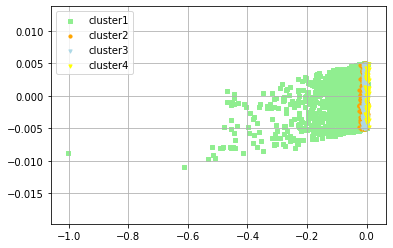

In [317]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [318]:
len(temp_cluster_result[temp_cluster_result['cluster']==0]) # 거래소 돈

3872

In [319]:
len(temp_cluster_result[temp_cluster_result['cluster']==1]) # 인플

806

In [320]:
len(temp_cluster_result[temp_cluster_result['cluster']==2]) # 비즈

462

In [321]:
len(temp_cluster_result[temp_cluster_result['cluster']==3]) # 기타

69

In [322]:
temp_cluster_result['category'] = 1 # 1 영문뉴스, 2 국문뉴스 , 3 twitter
temp_cluster_result.loc[temp_cluster_result['cluster']==0,'label'] = 12 # 거래소,돈
temp_cluster_result.loc[temp_cluster_result['cluster']==1,'label'] = 6 # 인플
temp_cluster_result.loc[temp_cluster_result['cluster']==2,'label'] = 7 # 비즈
temp_cluster_result.loc[temp_cluster_result['cluster']==3,'label'] = 13 # 기타

In [323]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [324]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [325]:
kmeans.inertia_

90.51286821454443

In [326]:
print ("Cluster id labels for inputted data")
print (labels)

Cluster id labels for inputted data
[2 3 3 ... 1 1 1]


In [327]:
cluster_values= list(model.wv.vocab)

In [328]:
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-90.51286


In [329]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

In [330]:
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.7269002


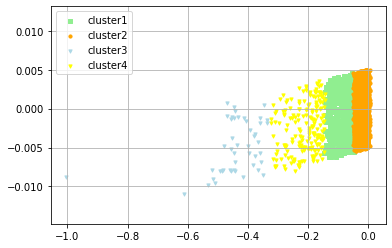

In [331]:
kmeans_label = kmeans.labels_

plt.scatter(X[kmeans_label==0,0],X[kmeans_label==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[kmeans_label==1,0],X[kmeans_label==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[kmeans_label==2,0],X[kmeans_label==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[kmeans_label==3,0],X[kmeans_label==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[kmeans_label==4,0],X[kmeans_label==4,1],c='red',marker='v',s=10 , label='cluster5')

plt.legend()
plt.grid(True)
plt.show()

In [332]:
temp_cluster_result1 = pd.DataFrame(columns=temp_heder)
temp_cluster_result1['word'] = list(model.wv.vocab)
temp_cluster_result1['cluster'] = kmeans_label

In [333]:
#temp_cluster_result1[temp_cluster_result1['cluster']==0].head(30) #시도 및 혼돈  # 혼란 부정적 
temp_cluster_result1['raw_data'] = X.tolist()

In [334]:
temp_cluster_result1['centroid'] = temp_cluster_result1['cluster'].apply(lambda x : centroids[x])

In [335]:
euclidean_centroid_list = []
for euclidean_centroid in temp_cluster_result1['centroid'] :
    euclidean_centroid_list.append(euclidean_centroid.tolist())

In [336]:
temp_distance1 = pairwise_distances(X,euclidean_centroid_list, metric='euclidean')

In [337]:
import scipy.spatial.distance as dist

In [338]:
temp_cluster_result1['distance'] = temp_cluster_result1.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [339]:
temp_cluster_result1['tfidf'] = tf_idf_value
temp_cluster_result1['score'] = temp_cluster_result1.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result1

In [340]:
temp_cluster_result1[temp_cluster_result1['cluster']==0].sort_values('score',ascending=False).nsmallest(50,'score') # 이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1872,"[-0.07913786917924881, 0.0032666667830199003, ...",tether,0,"[-0.07975979, -0.0007289207, -0.0038484088, -0...",0.027395,0.004667,1.022729,NaN
1102,"[-0.08386831730604172, 0.003497952362522483, -...",authority,0,"[-0.07975979, -0.0007289207, -0.0038484088, -0...",0.026207,0.003111,1.023096,NaN
907,"[-0.083889439702034, -0.002733854344114661, -0...",shapeshift,0,"[-0.07975979, -0.0007289207, -0.0038484088, -0...",0.027510,0.004356,1.023154,NaN
1689,"[-0.08279553055763245, -0.004020012449473143, ...",imagine,0,"[-0.07975979, -0.0007289207, -0.0038484088, -0...",0.028642,0.005289,1.023353,NaN
279,"[-0.07616808265447617, 0.001751910662278533, -...",available,0,"[-0.07975979, -0.0007289207, -0.0038484088, -0...",0.028085,0.003733,1.024352,NaN
1219,"[-0.08466491848230362, -0.001880939002148807, ...",thousand,0,"[-0.07975979, -0.0007289207, -0.0038484088, -0...",0.028095,0.003733,1.024362,NaN
1506,"[-0.07722777873277664, 0.0019672384951263666, ...",effect,0,"[-0.07975979, -0.0007289207, -0.0038484088, -0...",0.029732,0.005289,1.024443,NaN
1730,"[-0.08234541118144989, -0.004550278652459383, ...",mark,0,"[-0.07975979, -0.0007289207, -0.0038484088, -0...",0.028641,0.003733,1.024908,NaN
861,"[-0.08239365369081497, 0.0030525480397045612, ...",bitcoiners,0,"[-0.07975979, -0.0007289207, -0.0038484088, -0...",0.029697,0.004667,1.025030,NaN
1091,"[-0.08316515386104584, -0.0018188661197200418,...",concern,0,"[-0.07975979, -0.0007289207, -0.0038484088, -0...",0.028546,0.003422,1.025124,NaN


In [341]:
temp_cluster_result1[temp_cluster_result1['cluster']==1].sort_values('score',ascending=False).nsmallest(30,'score') # 인플

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
894,"[-0.008861356414854527, 0.0022536898031830788,...",soc_src=social,1,"[-0.013306186, -0.0001305801, -0.0006328477, -...",0.029334,0.008089,1.021245,NaN
2761,"[-0.017023850232362747, -0.004658673889935017,...",mishgea⁩,1,"[-0.013306186, -0.0001305801, -0.0006328477, -...",0.029878,0.008089,1.021789,NaN
3879,"[-0.01343529112637043, -0.0019967553671449423,...",v=unval,1,"[-0.013306186, -0.0001305801, -0.0006328477, -...",0.030147,0.008089,1.022058,NaN
2306,"[-0.01642327941954136, -0.002580965869128704, ...",d=pall,1,"[-0.013306186, -0.0001305801, -0.0006328477, -...",0.030789,0.008089,1.022700,NaN
4842,"[-0.012797524221241474, -0.0020106355659663677...",'melt,1,"[-0.013306186, -0.0001305801, -0.0006328477, -...",0.031862,0.008089,1.023773,NaN
3579,"[-0.018349554389715195, 0.003352968255057931, ...",'gambling,1,"[-0.013306186, -0.0001305801, -0.0006328477, -...",0.032200,0.008089,1.024111,NaN
2848,"[-0.011921608820557594, 0.00476185604929924, 0...",ตัวจริงเพื่อล้อเลียน,1,"[-0.013306186, -0.0001305801, -0.0006328477, -...",0.032299,0.008089,1.024210,NaN
954,"[-0.010920960456132889, 0.0036620667669922113,...",utm_medium=social,1,"[-0.013306186, -0.0001305801, -0.0006328477, -...",0.032386,0.008089,1.024297,NaN
2590,"[-0.012260195799171925, 0.002113806316629052, ...",confidence,1,"[-0.013306186, -0.0001305801, -0.0006328477, -...",0.025631,0.001244,1.024386,NaN
2818,"[-0.010218750685453415, 0.003742446657270193, ...",'frantic,1,"[-0.013306186, -0.0001305801, -0.0006328477, -...",0.033032,0.008089,1.024943,NaN


In [342]:
temp_cluster_result1[temp_cluster_result1['cluster']==2].sort_values('score',ascending=False).nsmallest(40,'score')  # 투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
0,"[-0.4410771131515503, -0.008013321086764336, -...",price,2,"[-0.4414603, -0.004934993, -0.020676421, -0.67...",0.041300,0.058491,0.982810,NaN
19,"[-0.4451506733894348, 0.0002107274194713682, -...",year,2,"[-0.4414603, -0.004934993, -0.020676421, -0.67...",0.048165,0.055068,0.993097,NaN
569,"[-0.4438803493976593, -0.00031946340459398925,...",talk,2,"[-0.4414603, -0.004934993, -0.020676421, -0.67...",0.032702,0.037957,0.994745,NaN
182,"[-0.4589335322380066, -0.00788220763206482, -0...",market,2,"[-0.4414603, -0.004934993, -0.020676421, -0.67...",0.084616,0.089603,0.995014,NaN
192,"[-0.4472315311431885, -0.007840676233172417, -...",look,2,"[-0.4414603, -0.004934993, -0.020676421, -0.67...",0.037364,0.033912,1.003452,NaN
389,"[-0.44498348236083984, -0.0012442268198356032,...",risk,2,"[-0.4414603, -0.004934993, -0.020676421, -0.67...",0.031124,0.023023,1.008102,NaN
131,"[-0.44135382771492004, -0.006824272684752941, ...",coin,2,"[-0.4414603, -0.004934993, -0.020676421, -0.67...",0.037421,0.029245,1.008176,NaN
519,"[-0.4368213415145874, -0.004711200948804617, -...",blockchain,2,"[-0.4414603, -0.004934993, -0.020676421, -0.67...",0.045298,0.029556,1.015741,NaN
21,"[-0.4537411034107208, -0.0037970654666423798, ...",network,2,"[-0.4414603, -0.004934993, -0.020676421, -0.67...",0.063044,0.028312,1.034732,NaN
330,"[-0.44643911719322205, -0.005754526704549789, ...",need,2,"[-0.4414603, -0.004934993, -0.020676421, -0.67...",0.065328,0.028001,1.037327,NaN


In [343]:
temp_cluster_result1[temp_cluster_result1['cluster']==3].sort_values('score',ascending=False).nsmallest(20,'score') # 비즈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
969,"[-0.2138242870569229, -0.0052920617163181305, ...",financial,3,"[-0.21038914, -0.0024088724, -0.009648299, -0....",0.026389,0.009334,1.017055,NaN
449,"[-0.20598790049552917, -0.0017965637380257249,...",core,3,"[-0.21038914, -0.0024088724, -0.009648299, -0....",0.028177,0.010267,1.017910,NaN
651,"[-0.20980407297611237, -0.004943381529301405, ...",level,3,"[-0.21038914, -0.0024088724, -0.009648299, -0....",0.032936,0.014934,1.018002,NaN
150,"[-0.21412087976932526, 0.0009247586131095886, ...",idea,3,"[-0.21038914, -0.0024088724, -0.009648299, -0....",0.028997,0.010267,1.018730,NaN
94,"[-0.2165316790342331, -0.0049228910356760025, ...",listen,3,"[-0.21038914, -0.0024088724, -0.009648299, -0....",0.033948,0.014623,1.019326,NaN
241,"[-0.21758215129375458, 0.0022401970345526934, ...",back,3,"[-0.21038914, -0.0024088724, -0.009648299, -0....",0.038544,0.011200,1.027344,NaN
42,"[-0.2190779596567154, -0.006792216096073389, -...",dollar,3,"[-0.21038914, -0.0024088724, -0.009648299, -0....",0.045008,0.012134,1.032874,NaN
22,"[-0.2053997963666916, 0.0023812372237443924, -...",smart,3,"[-0.21038914, -0.0024088724, -0.009648299, -0....",0.048404,0.010578,1.037826,NaN
26,"[-0.21423399448394775, -0.006775637157261372, ...",thank,3,"[-0.21038914, -0.0024088724, -0.009648299, -0....",0.050440,0.011511,1.038929,NaN
301,"[-0.2047615945339203, 0.0027140062302351, -0.0...",anyone,3,"[-0.21038914, -0.0024088724, -0.009648299, -0....",0.053023,0.010267,1.042756,NaN


In [344]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==0]) #이슈

644

In [345]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==1]) #인플

4327

In [346]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==2]) #투자

47

In [347]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==3]) #비즈

191

In [348]:
temp_cluster_result1['category'] = 3 # 1 영문뉴스, 2 국문뉴스 , 3 twitter
temp_cluster_result1.loc[temp_cluster_result1['cluster']==0,'label'] = 5 # 이슈
temp_cluster_result1.loc[temp_cluster_result1['cluster']==1,'label'] = 6 # 인플
temp_cluster_result1.loc[temp_cluster_result1['cluster']==2,'label'] = 11 # 투자
temp_cluster_result1.loc[temp_cluster_result1['cluster']==3,'label'] = 7 # 비즈

In [349]:
temp_cluster_result1['result'] = 1 # 1 상승 2 하락 3 보합
temp_cluster_result['result'] = 1
temp_cluster_result1['Silhouette'] = 0.7269002 # 1 상승 2 하락 3 보합
temp_cluster_result['Silhouette'] = 0.7269002

In [350]:
temp_cluster_result1.to_csv("../cluster/twitter/twitter_2019_up1_euclidean.csv")
temp_cluster_result.to_csv("../cluster/twitter/twitter_2019_up1_cosine.csv")

In [93]:
word_vectors = model.wv

In [94]:
vocabs = word_vectors.vocab.keys()

In [95]:
word_vector_list = [word_vectors[v]for v in vocabs]

In [96]:
print(word_vectors.similarity(w1='little',w2='push'))

0.99857104


In [97]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vector_list)

In [98]:
xys

array([[ 1.91762854e+00,  1.00464941e-04],
       [ 2.41042694e-01,  1.30420782e-03],
       [ 1.59111222e+00,  3.57644364e-03],
       ...,
       [-3.11496146e-01,  2.03772445e-03],
       [-3.11973668e-01,  2.79474988e-03],
       [-2.83442870e-01, -1.34272206e-03]])

In [99]:
xys[:,0]

array([ 1.91762854,  0.24104269,  1.59111222, ..., -0.31149615,
       -0.31197367, -0.28344287])

In [100]:
xys[:,1]

array([ 0.00010046,  0.00130421,  0.00357644, ...,  0.00203772,
        0.00279475, -0.00134272])

In [101]:
xs = xys[:,0]
ys = xys[:,1]

In [102]:
def plot_2d_graph(vocabs,xs,ys) :
    plt.figure(figsize=(8,6))
    plt.scatter(xs,ys,marker='o')
    for i,v in enumerate(vocabs) :
        plt.annotate(v,xy=(xs[i],ys[i]))

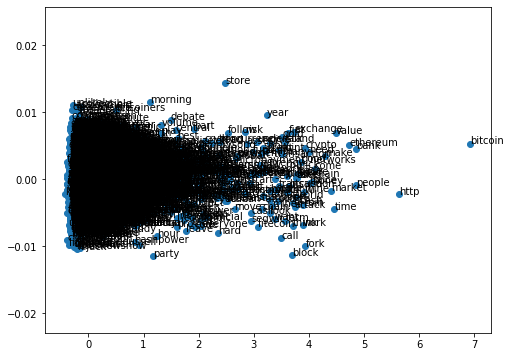

In [103]:
plot_2d_graph(vocabs,xs,ys)

In [100]:
nltk.help.upenn_tagset

<function nltk.help.upenn_tagset(tagpattern=None)>